<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Tawakalitu_Yusuf_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Relevant Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Checking the Dataset

In [ ]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

## Smoothing

In [ ]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

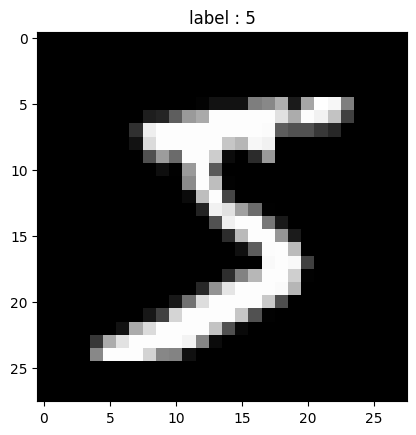

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

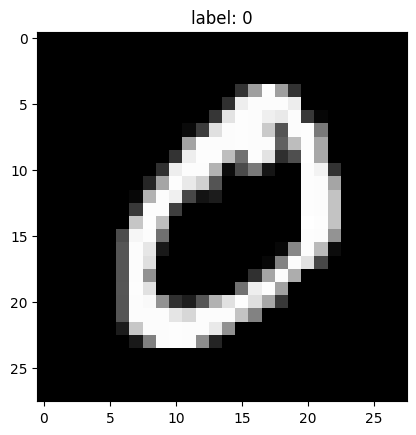

In [ ]:
image_1 = X_train[1].reshape(28,28)
plt.imshow(image_1, 'gray')
plt.title('label: {}'.format(y_train[1]))
plt.show()

## Pretreatment

In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [ ]:
class GetMiniBatch:
    """
    Iterator to get a mini-batch

    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int) # Use the built-in int instead of np.int

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [ ]:
#Instantiaitng the class
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # You can get the 5th mini batch
for mini_X_train, mini_y_train in get_mini_batch:
    # You can use a mini batch in this for statement
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([1, 7, 9, 1, 9, 1, 3, 2, 5, 2, 8, 5, 5, 6, 2, 7, 9, 5, 6, 0],
      dtype=uint8))


In [ ]:
class ScratchSimpleNeuralNetworkClassifier():
    def __init__(self, batch_size=20, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, n_batch=20, activation_function_key='tanh', lr=0.01, epoch=50, verbose=False):
        self.verbose = verbose
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.activation_function_key = activation_function_key
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch

        # Initialize weights and biases
        self.initial_weights()

    def initial_weights(self):
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.b1 = self.sigma * np.random.randn(1, self.n_nodes1)
        self.b2 = self.sigma * np.random.randn(1, self.n_nodes2)
        self.b3 = self.sigma * np.random.randn(1, self.n_output)

    def activation_function(self, X):
        if self.activation_function_key == 'sigmoid':
            return 1 / (1 + np.exp(-X))
        elif self.activation_function_key == 'tanh':
            return np.tanh(X)

    def forward(self, X):
        self.A1 = X @ self.W1 + self.b1
        self.Z1 = self.activation_function(self.A1)
        self.A2 = self.Z1 @ self.W2 + self.b2
        self.Z2 = self.activation_function(self.A2)
        self.A3 = self.Z2 @ self.W3 + self.b3
        self.Z3 = self.softmax(self.A3)

    def backward(self, X, y):
        # Convert y to one-hot encoding if it's not already
        if y.ndim == 1:
            y_one_hot = np.zeros((y.size, self.n_output))
            y_one_hot[np.arange(y.size), y] = 1
        else:
            y_one_hot = y

        dA3 = (self.Z3 - y_one_hot) / self.batch_size
        dW3 = self.Z2.T @ dA3
        dB3 = np.sum(dA3, axis=0)
        dZ2 = dA3 @ self.W3.T
        dA2 = dZ2 * (1 - self.Z2**2)
        dW2 = self.Z1.T @ dA2
        dB2 = np.sum(dA2, axis=0)
        dZ1 = dA2 @ self.W2.T
        dA1 = dZ1 * (1 - self.Z1**2)
        dW1 = X.T @ dA1
        dB1 = np.sum(dA1, axis=0)

        # Update weights and biases
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * dB3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * dB2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * dB1

    def softmax(self, A):
        exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))
        return exp_A / np.sum(exp_A, axis=1, keepdims=True)

    def loss_function(self, y, yt):
        delta = 1e-7
        return -np.mean(yt * np.log(y + delta))

    def fit(self, X, y, X_val=None, y_val=None):
        self.initial_weights()

        # Initialize logs
        self.log_loss = []
        self.log_val_loss = []
        self.log_acc = []
        self.log_val_acc = []

        for epoch in range(self.epoch):
            self.true_y = np.array([])
            self.pred_y = np.array([])

            # Shuffle and create mini-batches
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            n_batches = X.shape[0] // self.batch_size

            for i in range(n_batches):
                X_batch = X_shuffled[i * self.batch_size:(i + 1) * self.batch_size]
                y_batch = y_shuffled[i * self.batch_size:(i + 1) * self.batch_size]

                # Forward propagation
                self.forward(X_batch)

                # Backward propagation
                self.backward(X_batch, y_batch)

                # Log accuracy for batch
                self.true_y = np.concatenate([self.true_y, y_batch if y_batch.ndim == 1 else np.argmax(y_batch, axis=1)])
                self.pred_y = np.concatenate([self.pred_y, np.argmax(self.Z3, axis=1)])

            # Calculate and log metrics
            self.forward(X)  # Compute self.Z3 for entire training set
            loss = self.loss_function(self.Z3, y if y.ndim == 2 else np.eye(self.n_output)[y])
            self.log_loss.append(loss)
            acc = accuracy_score(self.true_y, self.pred_y)
            self.log_acc.append(acc)

            if X_val is not None and y_val is not None:
                self.forward(X_val)
                val_loss = self.loss_function(self.Z3, y_val if y_val.ndim == 2 else np.eye(self.n_output)[y_val])
                self.log_val_loss.append(val_loss)
                val_acc = accuracy_score(np.argmax(y_val, axis=1) if y_val.ndim == 2 else y_val, np.argmax(self.Z3, axis=1))
                self.log_val_acc.append(val_acc)

            if self.verbose:
                print(f'epoch:{epoch:>3} loss:{loss:.3f} acc:{acc:.3f}')

    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z3, axis=1)

## Problem 1

In [ ]:
n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10
sigma = 0.01 # Standard deviation of Gaussian distribution
W1 = sigma * np.random.randn(n_features, n_nodes1)
b1 = sigma * np.random.randn(1, n_nodes1)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b2 = sigma * np.random.randn(n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
b3 = sigma * np.random.randn(n_output)

print('shape of W1', W1.shape)
print('shape of b1', b1.shape)
print('shape of W2', W2.shape)
print('shape of b2', b2.shape)
print('shape of W3', W3.shape)
print('shape of b3', b3.shape)

shape of W1 (784, 400)
shape of b1 (1, 400)
shape of W2 (400, 200)
shape of b2 (200,)
shape of W3 (200, 10)
shape of b3 (10,)


# Problem 2

In [ ]:
X = X_train[0:20]

In [ ]:
#Linear combination of the first layer
z1 = np.dot(X, W1) + b1
print(z1.shape)
z1

(20, 400)


array([[-8.12510359e-02,  8.00754737e-02, -5.31517031e-03, ...,
         1.15934422e-01, -1.60300226e-01, -1.96859048e-01],
       [ 1.23849413e-01,  1.55542179e-02,  6.88462316e-02, ...,
         1.21359977e-01, -1.90692177e-04, -5.13768791e-02],
       [ 8.10459588e-02,  7.73137577e-02,  7.55948652e-02, ...,
         6.33234907e-02, -5.88195714e-02, -4.62453278e-02],
       ...,
       [ 6.76516868e-03,  1.60480659e-01, -5.58101239e-02, ...,
        -6.17087281e-03, -1.50898248e-02, -1.17701867e-01],
       [ 1.70070005e-01, -2.00053359e-01,  6.50447822e-02, ...,
         1.06123861e-01, -2.56538736e-02, -3.21700623e-02],
       [ 1.31804074e-01, -6.61885669e-02, -4.55848282e-02, ...,
         6.69228624e-02, -5.09766728e-02, -9.68864758e-02]])

In [ ]:
#Activation function for the first layer
sigma1 = 1/(1 + np.exp(-z1))
print(sigma1.shape)
sigma1

(20, 400)


array([[0.47969841, 0.52000818, 0.49867121, ..., 0.52895119, 0.46001054,
        0.45094356],
       [0.53092284, 0.50388848, 0.51720476, ..., 0.53030281, 0.49995233,
        0.4871586 ],
       [0.52025041, 0.51931882, 0.51888972, ..., 0.51582558, 0.48529935,
        0.48844073],
       ...,
       [0.50169129, 0.54003428, 0.48605109, ..., 0.49845729, 0.49622762,
        0.47060846],
       [0.54241532, 0.4501528 , 0.51625546, ..., 0.52650609, 0.49358688,
        0.49195818],
       [0.5329034 , 0.4834589 , 0.48860577, ..., 0.51672447, 0.48725859,
        0.47579731]])

In [ ]:
# Activation function for the second layer
z2 = np.dot(sigma1, W2) + b2
sigma2 = 1/(1 + np.exp(-z2))
print(sigma2.shape)
sigma2
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
print(W2.shape)
W2

(20, 200)
(400, 200)


array([[-0.01859084, -0.0046851 ,  0.00129393, ..., -0.0021524 ,
         0.01157398, -0.00244731],
       [ 0.02685092,  0.0155093 ,  0.00755601, ..., -0.02808203,
        -0.00173676,  0.00378285],
       [-0.00282786,  0.00509233, -0.00096543, ...,  0.00072244,
         0.01531698,  0.00503033],
       ...,
       [-0.00401922,  0.0064443 ,  0.00871605, ...,  0.01063836,
        -0.0026462 , -0.00089016],
       [-0.01072689, -0.0100787 , -0.00937059, ...,  0.00601396,
        -0.01542277,  0.00875628],
       [ 0.02203209,  0.00303241, -0.00891849, ...,  0.00950345,
        -0.00931689,  0.00325696]])

In [ ]:
# 3rd layer linear combination
z3 = np.dot(sigma2, W3) + b3
print('z3 shape', z3.shape)
z3

z3 shape (20, 10)


array([[-0.06610211, -0.17083384, -0.02807423,  0.05978912, -0.04849492,
         0.08196169,  0.02879033, -0.01587376,  0.06465661, -0.08418822],
       [-0.06620742, -0.1708139 , -0.02812015,  0.0598783 , -0.04832751,
         0.08171771,  0.02872393, -0.01568201,  0.06484412, -0.08450095],
       [-0.0659934 , -0.17093636, -0.02827087,  0.05979865, -0.04828776,
         0.08157178,  0.02867669, -0.01584663,  0.06454197, -0.08444508],
       [-0.06615106, -0.17093375, -0.02794266,  0.05987983, -0.04835987,
         0.0817362 ,  0.02869228, -0.01574749,  0.06491603, -0.08417209],
       [-0.06609659, -0.17092547, -0.02804888,  0.05980698, -0.04832981,
         0.08185795,  0.02867224, -0.01562887,  0.06475631, -0.08436869],
       [-0.0660482 , -0.1709656 , -0.0278767 ,  0.05974677, -0.04834267,
         0.08173292,  0.02864178, -0.01571882,  0.06446942, -0.08419213],
       [-0.06626999, -0.17090721, -0.0280711 ,  0.05992695, -0.04833738,
         0.08164777,  0.02883886, -0.01579133

In [ ]:
# 3rd layer activation functiom (softmax function)
sfmax  = np.zeros([len(X), 10])
for i in range (20):
  sfmax[i] = np.exp(z3[i]) / np.sum(np.exp(z3[i]), axis=0)
print('sfmax', sfmax.shape)
print(np.sum(sfmax))
print(sfmax)

sfmax (20, 10)
20.0
[[0.09502401 0.0855754  0.09870716 0.10777232 0.09671193 0.1101886
  0.10448276 0.09991881 0.10829818 0.09332084]
 [0.09501501 0.08557801 0.09870367 0.10778307 0.09672915 0.11016288
  0.10447692 0.09993903 0.10831963 0.09329265]
 [0.09504245 0.08557393 0.09869617 0.10778254 0.09674022 0.11015503
  0.10447979 0.09993004 0.108295   0.09330483]
 [0.09501653 0.08556431 0.09871721 0.10777889 0.09672212 0.11016047
  0.1044694  0.09992845 0.10832305 0.09331957]
 [0.0950238  0.0855669  0.0987089  0.10777341 0.09672715 0.11017631
  0.10446961 0.09994251 0.10830814 0.09330328]
 [0.09503126 0.08556604 0.09872887 0.10777016 0.09672882 0.11016585
  0.10446957 0.09993653 0.10828033 0.09332257]
 [0.09500999 0.08557086 0.09870947 0.10778936 0.09672913 0.11015625
  0.10448995 0.09992907 0.10832228 0.09329363]
 [0.09502079 0.08557607 0.09870478 0.10776895 0.09671249 0.11017056
  0.10448255 0.09994048 0.10831018 0.09331314]
 [0.09501416 0.08558255 0.09868451 0.10778284 0.09672546 0.11

# Problem 3

In [ ]:
y = y_train_one_hot[0:20]
loss = -y * np.log(sfmax/len(y))
print(loss)

[[0.         0.         0.         0.         0.         5.20129415
  0.         0.         0.         0.        ]
 [5.34945271 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         5.33145832 0.
  0.         0.         0.         0.        ]
 [0.         5.45421935 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         5.36763228]
 [0.         0.         5.31111018 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         5.45414274 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         5.22349795 0.         0.
  0.         0.         0.         0.        ]
 [0.         5.45400609 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.   

## Problem 4

In [ ]:
#3rd layer
delta_a3 = sfmax-y
delta_b3 = np.sum(delta_a3, axis =0)
delta_W3 = np.dot(z2.T, delta_a3)
delta_z2 = np.dot(delta_a3, W3.T)

print('delta a3: ', delta_a3.shape)
print('delta b3: ', delta_b3.shape)
print('delta W3: ', delta_W3.shape)
print('delta z2: ', delta_z2.shape)

delta a3:  (20, 10)
delta b3:  (10,)
delta W3:  (200, 10)
delta z2:  (20, 200)


In [ ]:
#2nd layer
delta_a2 = delta_z2 * (1-np.tanh(z2)**2)
delta_b2 = np.sum(delta_a2, axis=0)
delta_W2 = np.dot(z1.T, delta_a2)
delta_z1 = np.dot(delta_a2, W2.T)

print('delta a2: ', delta_a2.shape)
print('delta b2: ', delta_b2.shape)
print('delta W2: ', delta_W2.shape)
print('delta z1: ', delta_z1.shape)

delta a2:  (20, 200)
delta b2:  (200,)
delta W2:  (400, 200)
delta z1:  (20, 400)


In [ ]:
#1st layer
delta_a1 = delta_z1 * (1-np.tanh(z1)**2)
delta_b1 = np.sum(delta_a1, axis=0)
delta_W1 = np.dot(X.T, delta_a1)

print('delta a1: ', delta_a1.shape)
print('delta b1: ', delta_b1.shape)
print('delta W1: ', delta_W1.shape)

delta a1:  (20, 400)
delta b1:  (400,)
delta W1:  (784, 400)


Problem 5

In [ ]:
classifier = ScratchSimpleNeuralNetworkClassifier(epoch=30, n_features=784, n_nodes1=400, sigma=0.01, n_batch= 100, activation_function_key='tanh', lr=0.01, verbose=True)
classifier.fit(X_train, y_train, X_val=X_val, y_val=y_val)
clf_pred = classifier.predict(X_test)

epoch:  0 loss:0.067 acc:0.522
epoch:  1 loss:0.040 acc:0.852
epoch:  2 loss:0.035 acc:0.892
epoch:  3 loss:0.031 acc:0.904
epoch:  4 loss:0.029 acc:0.913
epoch:  5 loss:0.027 acc:0.919
epoch:  6 loss:0.025 acc:0.925
epoch:  7 loss:0.023 acc:0.929
epoch:  8 loss:0.022 acc:0.934
epoch:  9 loss:0.020 acc:0.939
epoch: 10 loss:0.019 acc:0.942
epoch: 11 loss:0.017 acc:0.946
epoch: 12 loss:0.016 acc:0.950
epoch: 13 loss:0.015 acc:0.953
epoch: 14 loss:0.014 acc:0.956
epoch: 15 loss:0.014 acc:0.958
epoch: 16 loss:0.013 acc:0.961
epoch: 17 loss:0.012 acc:0.963
epoch: 18 loss:0.011 acc:0.966
epoch: 19 loss:0.011 acc:0.967
epoch: 20 loss:0.010 acc:0.969
epoch: 21 loss:0.010 acc:0.971
epoch: 22 loss:0.009 acc:0.972
epoch: 23 loss:0.009 acc:0.974
epoch: 24 loss:0.008 acc:0.975
epoch: 25 loss:0.008 acc:0.976
epoch: 26 loss:0.007 acc:0.977
epoch: 27 loss:0.007 acc:0.978
epoch: 28 loss:0.007 acc:0.979
epoch: 29 loss:0.006 acc:0.980


In [ ]:
print(clf_pred)

[7 2 1 ... 4 5 6]


# Problem 6

In [ ]:
#classification_report
# Assuming X_test has 10000 samples and you want to compare against y_test
clf_pred = classifier.predict(X_test)
print('accuracy of the model', accuracy_score(y_test, clf_pred))

accuracy of the model 0.9699


# Problem 7: Plotting the learning cure

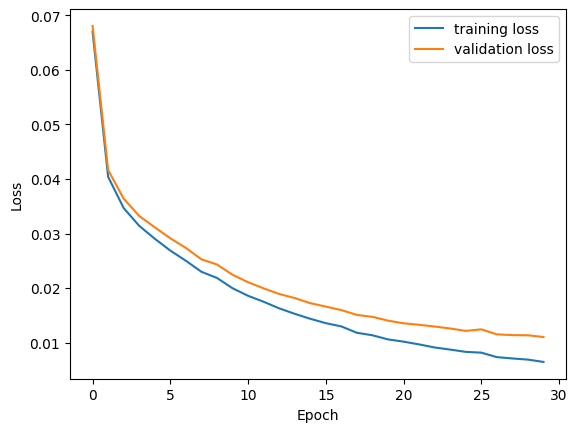

In [ ]:
#plotting the learning curve
plt.plot(classifier.log_loss, label='training loss')
plt.plot(classifier.log_val_loss, label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()